<h2 align="center">Outlier Treatment Using IQR and Box Plot</h2>

### Find outliers in heights data using IQR method

In [4]:
import pandas as pd

df = pd.read_csv("heights.csv")
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [5]:
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [6]:
Q1, Q3 = df.height.quantile([0.25,0.75])
Q1, Q3

(5.3500000000000005, 6.275)

In [7]:
IQR = Q3-Q1
IQR

0.9249999999999998

Find lower and upper boundries for outlier detection

In [8]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(3.962500000000001, 7.6625)

In [9]:
df[(df.height<lower)|(df.height>upper)]

,name,height
0,mohan,1.2
19,Liu,40.2


Above shows two outliers in our dataset. Now let's create a new dataframe that has these outliers removed

In [10]:
df_new = df[(df.height>lower)&(df.height<upper)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


### Find outliers in sales data using IQR and then box plot (a.k.a whisker plot)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# make sure to install openpyxl using "pip install openpyxl" before running below code
df = pd.read_excel("region_wise_sales.xlsx")
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [12]:
df.Region.unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [13]:
df_apac = df[df.Region=="APAC"]
df_europe = df[df.Region=="Europe"]
df_americas = df[df.Region=="Americas"]

In [14]:
def get_lower_upper(data):
    Q1, Q3 = data.Sales.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

In [15]:
lower, upper = get_lower_upper(df_apac)
lower, upper

(-737.125, 59747.875)

In [16]:
df_apac.Sales.describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [17]:
lower, upper = get_lower_upper(df_europe)
lower, upper

(7306.875, 17665.875)

In [18]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

In [19]:
df_europe[(df_europe.Sales<lower)|(df_europe.Sales>upper)]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


For Europe we see above one outlier. For other regions there are no outliers

### Outlier detection using a BOX PLOT

In [20]:
labels = df['Region'].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [21]:
plot_data = [df['Sales'][df['Region'] == label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896], dtype=int64),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895], dtype=int64),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387], dtype=int64)]

C:\Users\Ishaan Singh\AppData\Local\Temp\ipykernel_14364\2294222457.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=labels, vert=True)


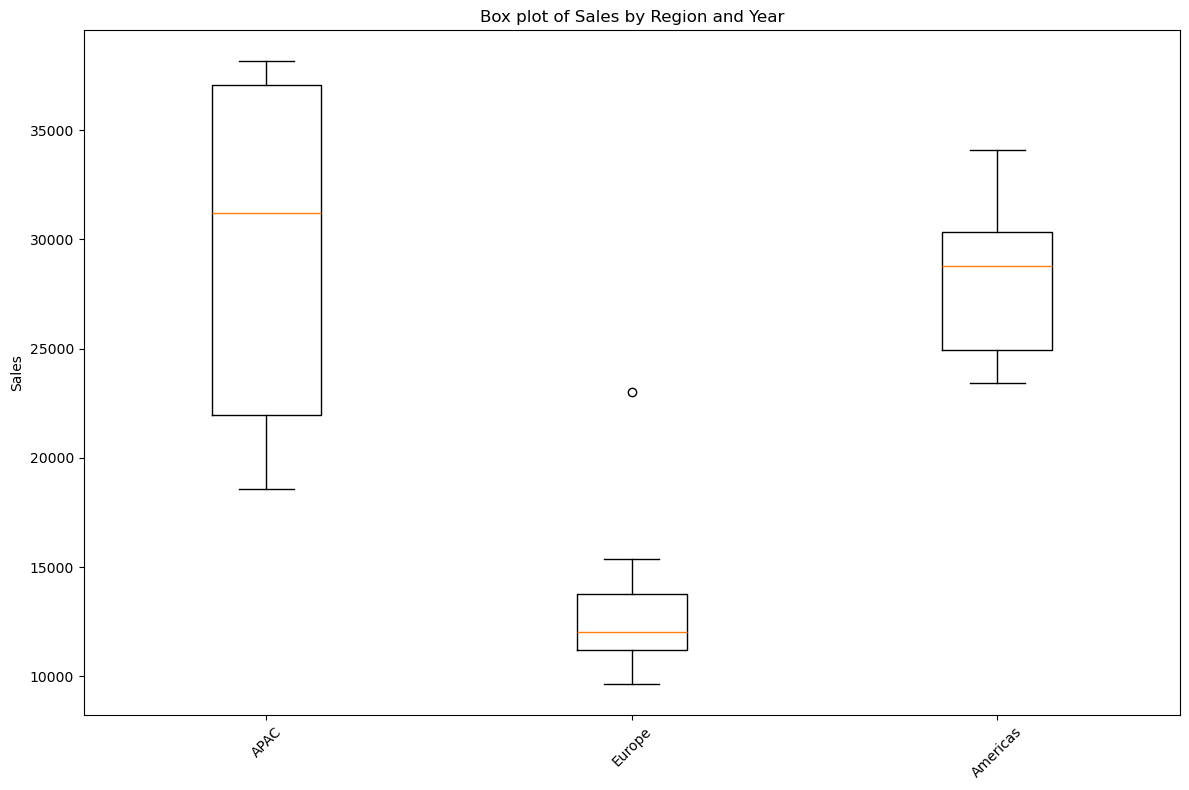

In [22]:
plt.figure(figsize=(12, 8))
plt.boxplot(plot_data, labels=labels, vert=True)
plt.title('Box plot of Sales by Region and Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

You can clearly see an outlier point above Europe box plot. This shows how one can use a box plot to spot outliers